In [ ]:
#Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#1. Read in Data
---



In [ ]:
# Read data
df = pd.read_csv('https://yelp-business-bucket.s3.amazonaws.com/originalTrain.csv')

# Drop any row containing NAs
df = df.dropna()

# 2. Model Training and Testing
---

In [ ]:
# Set all columns except 'is_open' as predictor variables. 'is_open' is the predicted value.
X = df.drop('is_open',axis=1)
y = df['is_open']

## Final features and attributes of dataset are below:  

### Predicted variable (y): 
- is_open (1 or 0)

### Features to train on (X): 

- type of parking available (dummified)  
- reservations         
- delivery             
- takeout              
- kidsfriendly         
- acceptcreditcard     
- outdoorseating       
- goodForGroups        
- alcohol              
- wifi                 
- number of stars (dummified)               
- price range (dummified)
- review count (binned, then dummified)
- restaurant density within 0.5mi radius (binned, then dummified)

In [ ]:
#train_test_split X and y
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
#Preview training set
for x in X_train.columns:
    print (x)

parking_garage
parking_lot
parking_street
parking_valet
parking_validated
reservations
delivery
takeout
kidsfriendly
acceptcreditcard
outdoorseating
goodForGroups
alcohol
wifi
star_1
star_1.5
star_2.0
star_2.5
star_3.0
star_3.5
star_4.0
star_4.5
star_5.0
price_1
price_2
price_3
price_4
review_37
review_82
review_184
review_max
density_8
density_18
density_38
density_274


# 2a. Logistic Regression
(Score = 0.79216)


---




In [ ]:
# Perform logistic regression on training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Log Reg Score of Test set
log_reg.score(X_test,y_test)

0.7921615201900237

# 2b. Random Forest Classifier
(Score = 0.75653)

---



In [ ]:
#Run random forest classifier, fit and score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

# classifier = rf.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# print(y_pred)

0.75

### Many iterations were tried in order to improve the log_reg and RF score including:
1. Not taking into account restaurant density within 0.5mi radius
2. Consolidating the different parking types (garage, lot, street) into one "is_there_parking" feature
3. Dropping all fields except: alcohol, wifi, stars, review counts, density
4. Dropping the 'parking_validated' feature as it had the least importance.
5. Training on just US cities while excluding CA cities.
6. Looking at just restaurants in Nevada

#2c. Other models

---



In [ ]:
# Build Models - Spot Check Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('Logistic Regression (LR)          ', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis (LDA)', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors (KNN)         ', KNeighborsClassifier()))
models.append(('Classification and Regression Trees (CART)', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes (NB)  ', GaussianNB()))
models.append(('Support Vector Machines (SVM)     ', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Logistic Regression (LR)          : 0.779586 (0.005456)
Linear Discriminant Analysis (LDA): 0.780019 (0.006298)
K-Nearest Neighbors (KNN)         : 0.759109 (0.006370)
Classification and Regression Trees (CART): 0.699291 (0.013685)
Gaussian Naive Bayes (NB)  : 0.717847 (0.010196)
Support Vector Machines (SVM)     : 0.775441 (0.000069)


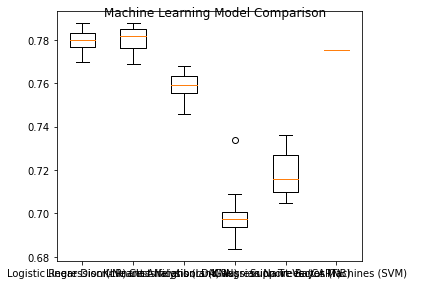

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.tight_layout()
fig.show()

# 3. Feature Importance

---

### 3a. Visualization of Feature Importances in ***Random Forest Classifier***
- Wifi and Outdoor seating were the most important non-dummified features
- Validated parking was the least important

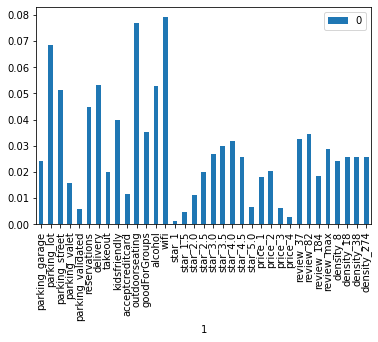

In [ ]:
#Bar chart of feature importances in Random Forest

pd.DataFrame([x for x in zip(rf.feature_importances_, X.columns)]).plot(kind='bar', x=1,y=0)

In [ ]:
sorted([x for x in zip(rf.feature_importances_, X.columns)], reverse=True)

[(0.07985265271831786, 'outdoorseating'),
 (0.07664633412410683, 'wifi'),
 (0.07017084611468574, 'parking_lot'),
 (0.05438656541884151, 'alcohol'),
 (0.05355016117912061, 'delivery'),
 (0.052808042515742795, 'parking_street'),
 (0.043058004310463416, 'reservations'),
 (0.03827491895896501, 'kidsfriendly'),
 (0.03693283297786185, 'goodForGroups'),
 (0.03514274338251243, 'review_37'),
 (0.032844845925978555, 'review_82'),
 (0.03143704761135388, 'star_3.5'),
 (0.030738167808299962, 'star_4.0'),
 (0.026568004790213613, 'review_max'),
 (0.026388437139693063, 'star_3.0'),
 (0.026349981671360028, 'density_274'),
 (0.02604946792501817, 'density_38'),
 (0.025244081347166634, 'parking_garage'),
 (0.02497263721808239, 'star_4.5'),
 (0.02481111556358947, 'density_18'),
 (0.02405332496070567, 'density_8'),
 (0.020031064065536994, 'star_2.5'),
 (0.01975277772710115, 'price_2'),
 (0.0194408113950409, 'review_184'),
 (0.018771039594340455, 'takeout'),
 (0.01731782939827359, 'price_1'),
 (0.01727618991

### 3b. Visualization of Feature Importance through Coefficients in ***Logistic Regression***
- Features with Positive coefficients predict Is_Open = 1
- Features with Negative coefficients predict Is_Open = 0

**Several Observations:**
- High review counts highly correlated (0.8) with restaurants being open (sort of a circular reference..)
- Having lower star counts (1.5-2.5) seems to be more positively correlated with restaurant success than having more stars (3-5). 
- Also, less expensive = more likely to be open (having 1 '$' sign had coeff = 0.275)
- ∴ Less expensive places that have worse customer ratings are more likely to survive (?)
- Taking reservations = slight negative correlation to restaurant being open (-0.3)
- Taking Delivery orders = slight positive correlation to restaurant being open (0.35)
- Having less competition (<8 restaurants in 0.5mi radius) = positive correlation to restaurant being open (0.378)


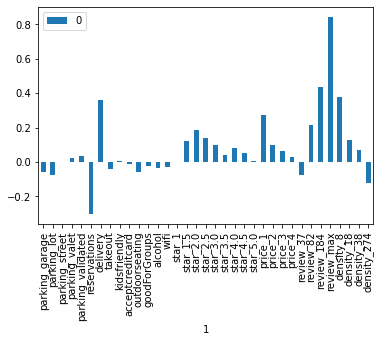

In [ ]:
#Bar chart of feature coefficients in Logistic Regression

pd.DataFrame([x for x in zip(log_reg.coef_[0], X.columns)]).plot(kind='bar', x=1,y=0)

In [ ]:
[x for x in zip(log_reg.coef_[0], X.columns)]

[(-0.24504409777177902, 'parking_garage'),
 (-0.1732404095262957, 'parking_lot'),
 (-0.02049462197822242, 'parking_street'),
 (-0.07787847451113795, 'parking_valet'),
 (0.28360229751597654, 'parking_validated'),
 (-0.5690441885787004, 'reservations'),
 (0.7293285137463845, 'delivery'),
 (-0.19595808744575652, 'takeout'),
 (0.010464131516453342, 'kidsfriendly'),
 (-0.18280191561441445, 'acceptcreditcard'),
 (-0.10883537799845869, 'outdoorseating'),
 (-0.004107050552714229, 'goodForGroups'),
 (-0.052516076465538165, 'alcohol'),
 (-0.09169976392629678, 'wifi'),
 (-0.48568127666923694, 'star_1'),
 (0.5026294496334897, 'star_1.5'),
 (0.6026942284782577, 'star_2.0'),
 (0.21046279478168653, 'star_2.5'),
 (-0.033987370107154684, 'star_3.0'),
 (-0.22974528785122256, 'star_3.5'),
 (-0.10525258806619504, 'star_4.0'),
 (-0.18457589631935378, 'star_4.5'),
 (-0.20564781400273485, 'star_5.0'),
 (0.26534102721846575, 'price_1'),
 (-0.1683344889881279, 'price_2'),
 (0.06898936576330074, 'price_3'),
 (-

# 4. Correlation Heatmap

---


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


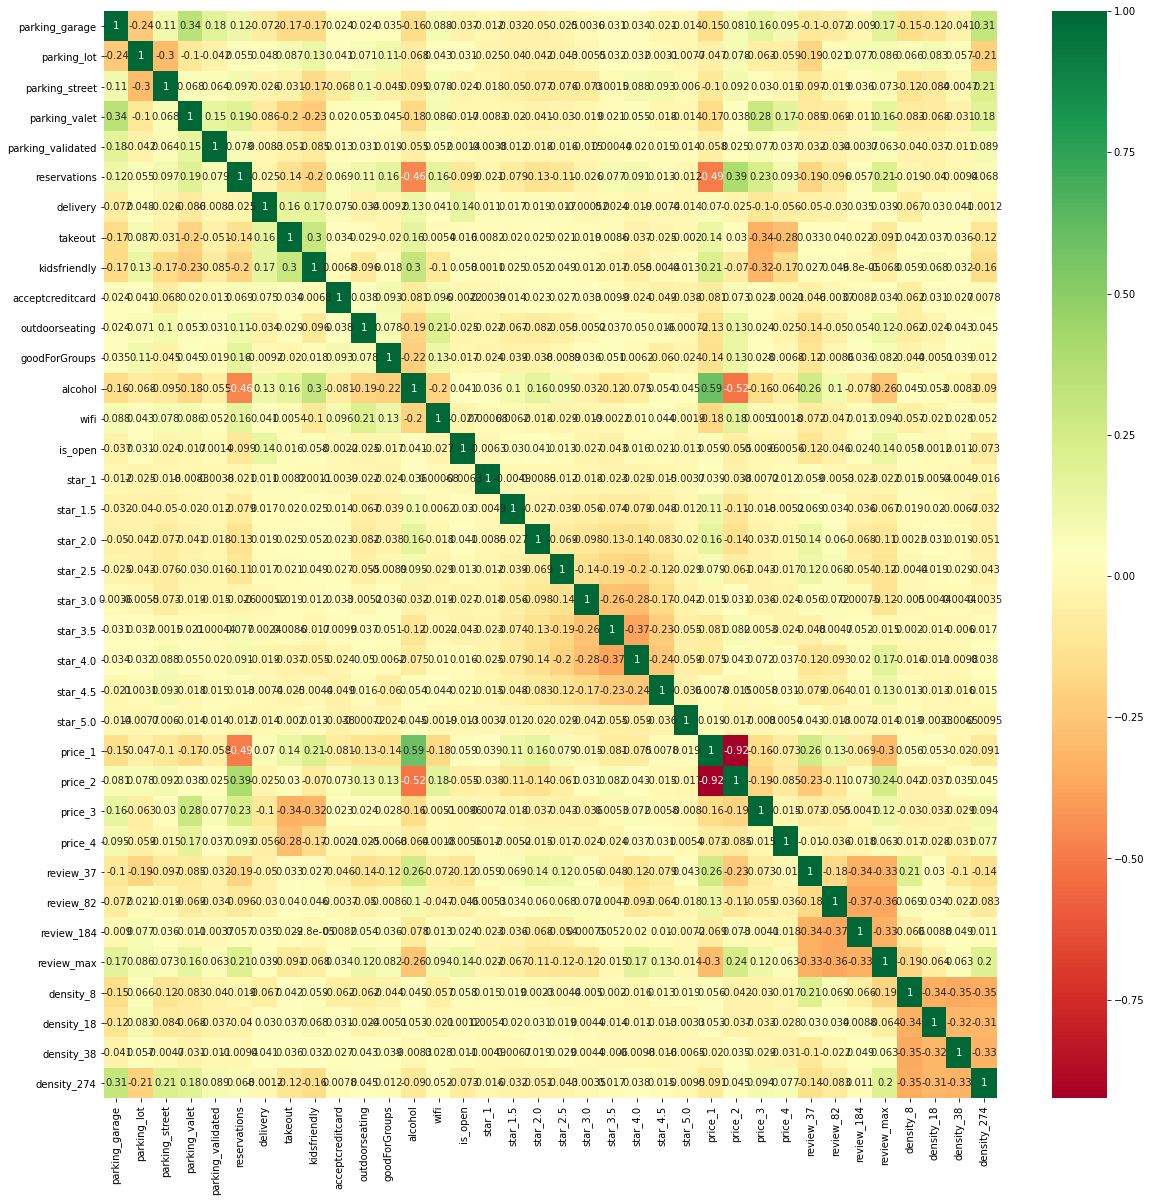

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('is_open', axis=1) #independent columns
y = df['is_open'] #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#5. Confusion Matrices - Random Forest v. Logistic Regression

---



### 5a. Side-by-side Comparison of Random Forest and Logistic Regression Confusion Matrices:
- LogReg had higher incidence of false positives (0.89 versus 0.76)
- LogReg had lower incidence of false negatives (0.025 versus 0.094)

- Overall score for LogReg: 0.79 and for RF: 0.76


<br>
<img src = 'https://yelp-business-bucket.s3.amazonaws.com/confusion_matrices.jpg'>

###5b. Confusion Matrix - Random Forest (Code below)

              precision    recall  f1-score   support

           0       0.40      0.24      0.30      1069
           1       0.82      0.91      0.86      3983

    accuracy                           0.76      5052
   macro avg       0.61      0.57      0.58      5052
weighted avg       0.73      0.76      0.74      5052

Confusion matrix (RF), without normalization
[[ 255  814]
 [ 375 3608]]
Normalized confusion matrix (RF)
[[0.24 0.76]
 [0.09 0.91]]


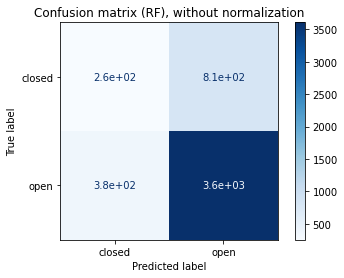

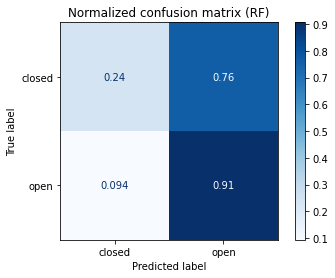

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
# import some data to play with
X = df.drop('is_open',axis=1)
y = df['is_open']
class_names = ["closed","open"]
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results

classifier = rf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix (RF), without normalization", None),
                  ("Normalized confusion matrix (RF)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test, labels=None,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

###5c. Confusion Matrix - Logistic Regression (Code below)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.54      0.11      0.19      1069
           1       0.80      0.97      0.88      3983

    accuracy                           0.79      5052
   macro avg       0.67      0.54      0.53      5052
weighted avg       0.75      0.79      0.73      5052

Confusion matrix (LogReg), without normalization
[[ 120  949]
 [ 101 3882]]
Normalized confusion matrix (LogReg)
[[0.11 0.89]
 [0.03 0.97]]


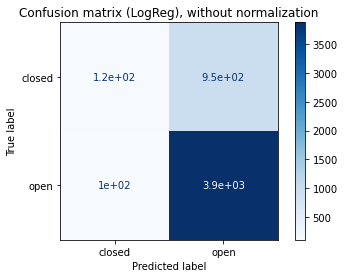

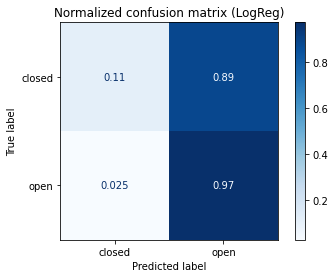

In [ ]:
classifier2 = LogisticRegression().fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix (LogReg), without normalization", None),
                  ("Normalized confusion matrix (LogReg)", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier2, X_test, y_test, labels=None,
                                 display_labels=class_names, 
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

# 6. Future Direction

---
- Map of currently open restaurants with prediction of whether or not it will be open in the future given its Yelp attributes.
- Incorporate detailed look at reviews of the restaurants in the model -- look for key words to perform sentiment analysis (i.e. patrons liked, loved, disliked, or hated this restaurant)
- Determine likelihood of being open within a certain future timeframe (in 1 month, 6 months, 1 year, 2 years, 5 years).  This would involve delving into historical Yelp data, looking at dates of reviews, etc.
- Train models on different geographical areas
- Different bins for restaurant density, review counts
-Because of COVID, we could not use real-time data since COVID accounted for many restaurant closure.
- Include different types of cuisine (Mexican, Italian, etc) as a feature.
